In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import speelysis as sp

In [2]:
import inspect
print(inspect.getsource(sp.mel_filter_bank))
print(inspect.getsource(sp.tri_window))

def mel_filter_bank(fs: int, n: int, n_bins: int, mel_param=700) -> np.ndarray:
    """メルフィルタバンク

    Args:
        f (int): 周波数
        n (int): 離散信号要素数
        n_bins (int): ビン数
        mel_param (int): メル尺度の自由パラメータ

    Returns:
        np.ndarray[shape=(n, n_bins), dtype=float]: メルフィルタバンク
    """

    mel_scaled: Callable[[float], float] = mel_scale(mel_param)
    imel_scaled: Callable[[float], float] = imel_scale(mel_param)

    mel_end = int(mel_scaled(fs)) + 1

    mel_list = np.arange(0, mel_end, mel_end // (n_bins + 1))

    hz_l_iter = iter(mel_list)
    hz_r_iter = iter(mel_list)
    next(hz_r_iter)
    next(hz_r_iter)

    hz_l_iter = (imel_scaled(b)
                 for b
                 in hz_l_iter)

    hz_r_iter = (imel_scaled(b)
                 for b
                 in hz_r_iter)
    
    return np.array([tri_window(fs, n, l, r) 
                     for l, r 
                     in zip(hz_l_iter, hz_r_iter)])

def tri_window(fs: int, n: int, l: float, r: float) -

In [3]:
# サンプリング周波数 16000 (ナイキスト周波数 = 8000)
# FFTの要素数 1024 (ナイキスト周波数に合わせ 512)

m = sp.mel_filter_bank(8000, 512, 20)
print(m.shape)
fs = np.linspace(0, 8000, 512)

(20, 512)


(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)


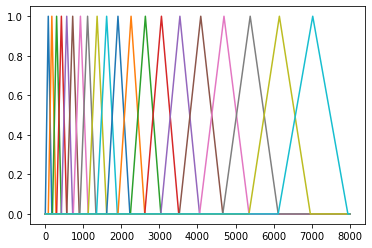

In [4]:
for a in m:
    print(a.shape)
    plt.plot(fs, a)